In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Text(0.5, 1.0, 'Eqk 1 origin time= 10.250033s, residual= 0.309982')

Text(0.5, 1.0, 'source 2 origin time= 13.306232s, residual= 0.343681')

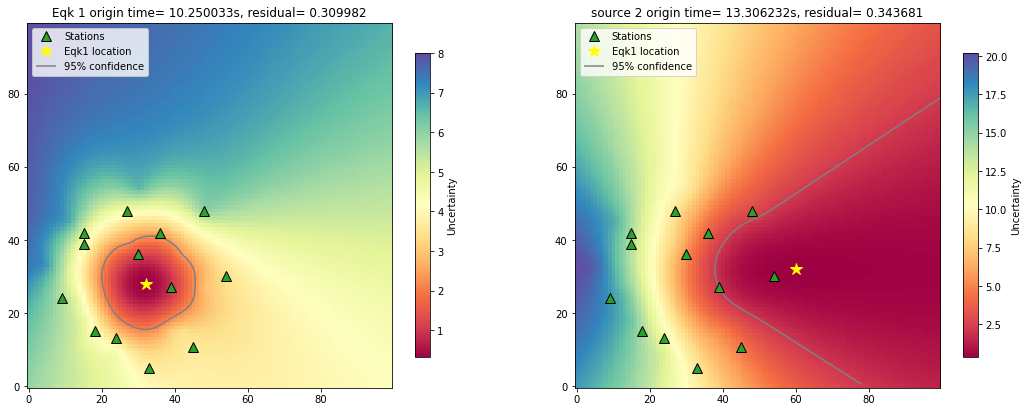

In [2]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

x=[9,24,33,45,39,54,15,36,27,48,15,18,30]
y=[24,13.2,4.8,10.8,27,30,39,42,48,48,42,15,36]
t1=[14.189,13.679,13.491,14.406,13.075,15.234,13.270,12.239,12.835,14.574,12.624,13.496,10.578]
t2=[20.950,21.718,21.467,21.713,20.034,20.153,18.188,16.008,15.197,16.280,16.907,21.312,16.664]

grid=[]
for i in np.arange(0,100,1):
    for j in np.arange(0,100,1):
        grid.append([i,j])

predT=[]
for point in grid:
    xx=point[0]
    yy=point[1]
    time=np.sqrt((xx-x)**2+(yy-y)**2)/6
    predT.append(time)

res1=[];res2=[]
t01=[];t02=[]
X1=[];X2=[]
for predtimes in predT:
    #origin time
    T01=sum(t1-predtimes)/len(x);T02=sum(t2-predtimes)/len(x)
    t01.append(T01);t02.append(T02)
    #residual
    residual1=(t1-predtimes-T01)**2;residual2=(t2-predtimes-T02)**2
    sig1=sum(residual1)/len(x);sig2=sum(residual2)/len(x)
    res1.append(sig1);res2.append(sig2)
    X1.append(sum(residual1)/sig1**2);X2.append(sum(residual2)/sig2**2)

bestt1=np.array(t01)[np.where(res1==min(res1))]
bestt2=np.array(t02)[np.where(res2==min(np.array(res2)))]
map1=np.array(res1).reshape(100,100);map2=np.array(res2).reshape(100,100)
loc1=np.where(map1==min(res1));loc2=np.where(map2==min(res2))
s1=scipy.stats.scoreatpercentile(X1, 95);s2=scipy.stats.scoreatpercentile(X2, 5)

fig=plt.figure(figsize=(18,8))
ax=fig.add_subplot(1,2,1)
pos=plt.imshow(map1,origin="lower", cmap='Spectral')
plt.plot(x,y,'^',markeredgecolor='black',color='tab:green',markersize=10.5,label='Stations')
plt.plot(loc1[1],loc1[0],'*',color='yellow',markersize=12,label='Eqk1 location')
CS=plt.contour(np.array(X1).reshape(100,100),[s1],origin='lower',colors='gray')
label='95% confidence';CS.collections[0].set_label(label)
fig.colorbar(pos, anchor=(0, 0.3), shrink=0.7,label='Uncertainty')
plt.title('Eqk 1 origin time= %fs, residual= %f' %(bestt1, map1[loc1]))
plt.legend(loc='upper left')
ax2=fig.add_subplot(1,2,2)
pos=plt.imshow(map2,origin="lower",cmap='Spectral')
plt.plot(x,y,'^',markeredgecolor='black',color='tab:green',markersize=10.5,label='Stations')
plt.plot(loc2[1],loc2[0],'*',color='yellow',markersize=12,label='Eqk1 location')
CS=plt.contour(np.array(X2).reshape(100,100),[s1],origin='lower',colors='gray')
CS.collections[0].set_label(label)
fig.colorbar(pos, anchor=(0, 0.3), shrink=0.7,label='Uncertainty')
plt.title('source 2 origin time= %fs, residual= %f' %(bestt2, map2[loc2]))
plt.legend(loc='upper left')